# Predicitng Potability
By: Nikki de Vries

## The Goal: 
- Find drivers of potability based of water quality metrics from 3276 different bodies of water.
- Potability is defined as potable water, water that is suitable for drinking and is safe for human consumption.

# Inital Questions: 
1. Could chloramines be a big influence? They are used to treat water to make it drinkable.
2. Could Turbidity be important? How much clarity in the water could be a major impact on drinkable water.
3. Could ph be important? Is the water to acidic or too basic? Humans can safley consume water on a ph range of 6.5 to 8.5.

# Project Outline: 
1. Data Acquisition: 
    - Acquire the data from: https://www.kaggle.com/datasets/adityakadiwal/water-potability
2. Data Peperations: 
    - Get an overhead look at the data
    - Investigate null values
    - Investigate outliers
    - Clean up column names
3. Data Exploration: 
    - Analyze Univariate variables
    - Analyze Bivariate variables
    - Analyze Multivariate variables
    - Statistical Testing: 
        - Chi2
        - Spearman's R
4. Modeling: 
    - Decision Tree
    - Random Forest
    - KNN
    - Logistic Regression
5. Presentation: 
    - Create a 5 minute storytelling presentation

# Data Dictionary

| **Quality Index** | **Detailed Definition** | **Simplified** | **Mesaurement** |  **Safe Range** | 
|-------------------|-----------------|----------------| ----------------|-------------|
|pH | A quantitative measure of the acidity or basicity of an aqueous or other liquid solution | The measure of the acidity or basicity of water | pH | 6.5 to 8.5 |
|Hardness | the total calcium and magnesium ion concentration in a water sample | How hard or soft the water is | mg/L <br> **Levels** <br> 0 - 17.1 : Soft <br> 17.1 - 60 : Slightly Hard <br> 60 - 120 : Moderately Hard <br> 120 - 180 : Hard <br> 180+ : Very Hard | 120 - 170 mg/L |
| Total dissolved solids (TDS) | Dissovled inoragnic and organic compounds. Can be: Salts, Potassium, Calcium, Sodium, Bicarbonates etc. | How many minerals are in the water | ppm | 500 ppm - 1000 ppm |
|Chloramines | Chlorine and Chloramine used to treat water | Disinfectants used to public water systems to treat the water | ppm |Less than 4 mg/L |
|Sulfate | Naturally occurring minerals in minerals, soil, and rocks | Large amounts of sulfates can cause laxative effects | mg/L |Less than 250 mg/L |
|Conductivity | Measure the ionic process of a solution that enables it to transmit current | Amount of ion concentraions in the water that result in electrial conductivity | μS/cm |Less than 400  μS/cm |
|Organic Carbon | (TOC) Total Organic Carbon is the measure of the total amount of carbon in organic compouns in pure water| TOC can come from decaying natural organic mattter | ppm |Less than 3 mg/L | 
| Trihalomethanes | Formed when natural organic mateials react with chlorine | Chemicals found in water treated with chlorine| μS/cm  | Less than 80 ppm |
| Turbidity | Meaure of light penetraion of water impacted by suspened materials | How much supspended materias in the water impacting clarity | NTU |Lower than 5.00 NTU |
| Potability | potable water is suitable for drinking | Is the water safe for human consumption | 1 indicates potable, 0 indicates not potable |

# Imports: 

In [1]:
# environmental imports: 
import wrangle as wr

# core imports:
import pandas as pd
import numpy as np

# stats and viz
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# reduce warnings: 
import warnings
warnings.filterwarnings("ignore")

# modeling:
# for random forest
from sklearn.ensemble import RandomForestClassifier
import modeling as nf

# Acquire: 
- Data was imported as a csv from the water quality link and saved into a dataframe.

In [2]:
# using the wrangle acquire water function get the data:
df = wr.acquire_water()

# Prepare: 
- Steps taken to clean the data: 
    - Remove null values:
        1. Sulfates: 23%
        2. ph: 14%
        3. Trihalomethanes: 4%
    - For this first iteration through the project I will drop the null values. Based on personal opinion, I do not want to impute values that could potential impact the saftey of drinking water. 
    - Rename the columns to be lowercase
- Feature Engineering: 
    - Based on exploration, I decided to create new columns for feature ranges that that are safe for human consumption. These ranges are based on informatio from the internet, WHO, and the EPA.
    - Split the data into train, validate, test
- Preprocessing (after explore): 
    - Remove the duplucate columns when making dummies

In [3]:
# using the wranlge prep water functio to prep the data:
df = wr.prep_water(df)

In [4]:
# using wrangle safe water, create new features: 
df = wr.safe_water(df)

In [5]:
# using wrange create_dummies, make dummies for these features
df = wr.create_dummies(df)

In [6]:
# using wrange split, make train, validate, test
train, validate, test = wr.split_water(df)

# Explore
- Phase On: Variables without bins: 
    - Look at univariate
    - Look at bivariate
    - Look at Multivarite
    - Hypothesis testings
- Phase two: New Features based on ranges: 
    - Look at univaraite
    - Look at bivarite
    - Look a Multivariate
    - Hypothesis testing

# 1. Does Potability differ across ph?
$H_0$ : There is no difference in the mean potability over ph levels. <br>
$H_a$ : There is a difference in the mean potability over ph levels.

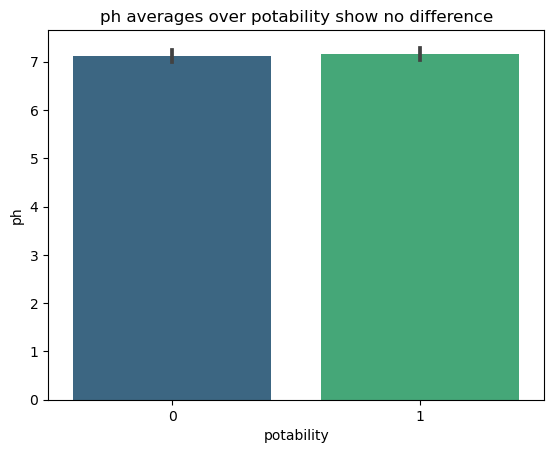

In [7]:
# visualization: 
sns.barplot(data = train, x = 'potability', y = 'ph' , palette = 'viridis')
plt.title('ph averages over potability show no difference');

In [8]:
# statistical test: 
stat, p_val = stats.mannwhitneyu(
            train[train.potability == 0]['ph'],
            train[train.potability == 1]['ph'])
print(f'Mann-Whitneyu test for ph')
if p_val < 0.05:
     print('We can reject the null hypothesis; the means are different.')
else:
    print('We cannot reject the null hypothesis')

Mann-Whitneyu test for ph
We cannot reject the null hypothesis


# 2. Does potability differ across chloramines?
$H_0$ : There is no difference in the mean potability over chloramine levels. <br>
$H_a$ : There is a difference in the mean potability over chloramine levels.

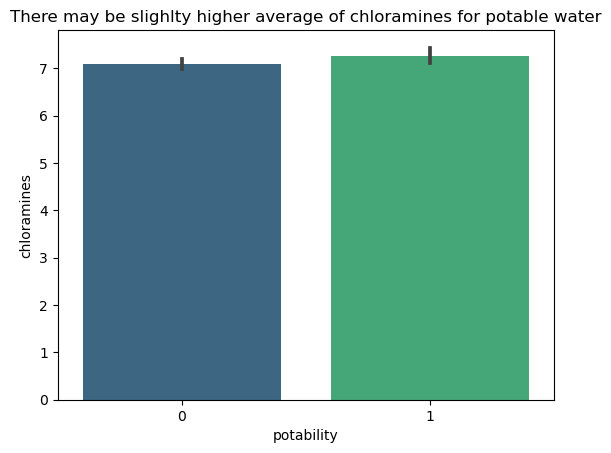

In [9]:
# visualization: 
sns.barplot(data = train, x = 'potability', y = 'chloramines' , palette = 'viridis')
plt.title('There may be slighlty higher average of chloramines for potable water');

In [10]:
# statistical test: 
stat, p_val = stats.mannwhitneyu(
            train[train.potability == 0]['chloramines'],
            train[train.potability == 1]['chloramines'])
print(f'Mann-Whitneyu test for chloramines')
if p_val < 0.05:
     print('We can reject the null hypothesis; the means are different.')
else:
    print('We cannot reject the null hypothesis')

Mann-Whitneyu test for chloramines
We cannot reject the null hypothesis


# 3. If we organize ph levels by ranges that are safe for humans, does it impact potability?
$H_0$ : ph_range and potability are independent of each other. <br>
$H_a$ : ph_range and potability are dependent on each other.

In [11]:
# variables
null_hypothesis = 'ph_range and potability are independent of each other'
alternative_hypothesis = 'ph_range and potability are dependent on each other'

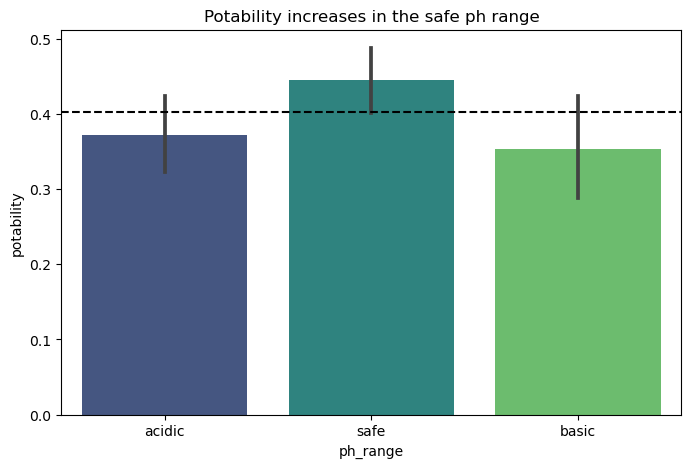

In [12]:
# visualization
plt.figure(figsize=(8,5))
sns.barplot(data = train, x = train.ph_range, y = 'potability', palette = 'viridis')
plt.title('Potability increases in the safe ph range')
overall_rate = train['potability'].mean()
plt.axhline(overall_rate, ls = '--', color = 'black')
plt.show()

In [13]:
# Chi test: 
observed = pd.crosstab(train.ph_range, train['potability'])

chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")

We reject the null hypothesis: ph_range and potability are independent of each other
Therefore: ph_range and potability are dependent on each other


# 4. If we organize hardness by a water hardness scale, does it impact potability?
$H_0$ : hardnesss_range and potability are independent of each other. <br>
$H_a$ : hardness_range and potability are dependent on each other.

In [14]:
# variables: 
null_hypothesis = 'hardness_range and potability are independent of each other'
alternative_hypothesis = 'hardness_range and potability are dependent on each other'

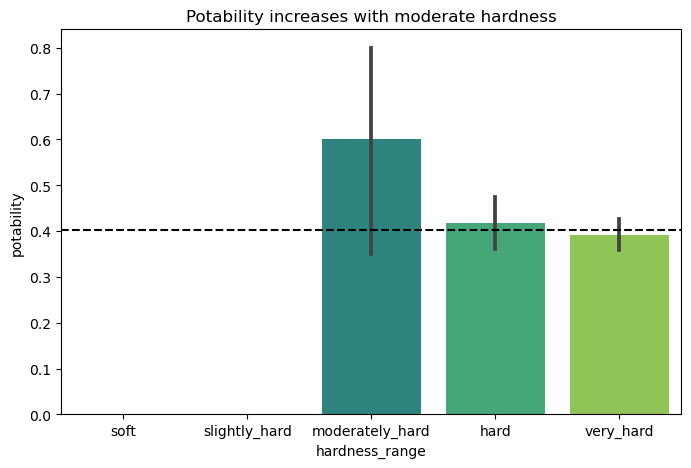

In [15]:
# visualization: 
plt.figure(figsize=(8,5))
sns.barplot(data = train, x = train.hardness_range, y = 'potability', palette = 'viridis')
plt.title('Potability increases with moderate hardness')
overall_rate = train['potability'].mean()
plt.axhline(overall_rate, ls = '--', color = 'black')
plt.show()

In [16]:
# Chi test: 
observed = pd.crosstab(train.hardness_range, train['potability'])

chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")

We fail to reject the null, therefore: hardness_range and potability are independent of each other


# Explore Summary: 
A more detailed summary of the summary is listed on the readme. <br>
1. <ins>Phase one:</ins> Exploring the features without feature engineering. 


    - Single features on their own do not impact portability. After completing the statistical test comparison of means, no feature was statistically significant, and the null hypothesis could not be rejected.
    
    
    - 59 percent of observations are not potable or safe to drink. 
    
2. <ins>Phase two:</ins> Exploring the features organized in safe ranges for human consumption.


    - To explore the features more to find what could potentially drive portability, I binned features on safe levels for human consumption. These levels were chosen based on the documentation provided by the data source, the WHO, the EPA, and online sources. 
    
    
    - Once the features had been binned, I ran statistical tests, $Chi^2$, to find if the potability was dependent on these new features. One feature, the ph range, did reject the null hypothesis. 
    
    
3. <ins>Machine Learning Selection:</ins> Select K Best, RFE, and Sequential Feature Selector:


    - Due to not finding statistical significance for features on their own, I inquired as to what might be found by machine learning selection. I used Select K best, RFE, and Sequential Feature selector. 
    
    
    - Phase one features that were selected were: ph, hardness, chloramines, and conductivity
        
    
    
    - Phase two features that were selected were: ph, hardness, ph_range_safe, hardness_range_moderately_hard

# Modeling: 
 - Machine learning models that were used: 
     - Decision Tree
     - Random Forest
     - KNN
     - Logistic Regression
- Two tests were run with the models: Using the best features or using all the features. 


    - Set features are the following: 
        - ph
        - hardness
        - chloramines
        - conductivity
        - ph_range_safe
        - hardness_range_moderately_hard
        - hardness_range_hard
                
                         
- I ran mulitple models for each machine learning model comparing set features to all features. <br>

**Best Preforming:**
- Random Forest with all Features

In [17]:
# prepocessing: using wrangle drop columns to remove duplicate columns for modeling
train, validate, test = wr.drop_columns(train, validate, test)

In [18]:
# create our variable:
set_features = ['ph','hardness','chloramines','conductivity','ph_range_safe',
                'hardness_range_moderately_hard', 'hardness_range_hard'] 
all_features = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity',
       'ph_range_safe', 'ph_range_basic', 'hardness_range_slightly_hard',
       'hardness_range_moderately_hard', 'hardness_range_hard',
       'hardness_range_very_hard', 'solids_range_good', 'solids_range_fair',
       'solids_range_poor', 'solids_range_unacceptable',
       'chloramines_range_high', 'sulfate_range_high',
       'conductivity_rage_high', 'organic_car_range_high',
       'trihalomethanes_range_high', 'turbidity_range_high']

# Random Forest with all Features: 

In [19]:
# Create X and Y
X_train = train[all_features]
y_train = train.potability

X_val = validate[all_features]
y_val = validate.potability

X_test = test[all_features]
y_test = test.potability

In [20]:
# lets get our baseline: 
baseline = y_train.mode()
matches_baseline_prediction = y_train == 0
baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.6


In [21]:
# run the model on a depth of 4
nf.evaluate_random_forest(X_train, y_train, X_val, y_val)

,max_depth,train_accuracy,validate_accuracy,difference
0,4,0.679111,0.6294,0.049712


# Random Forest with set Features: 

In [22]:
# Create X and Y
X_train = train[set_features]
y_train = train.potability

X_val = validate[set_features]
y_val = validate.potability

X_test = test[set_features]
y_test = test.potability

In [23]:
# lets get our baseline: 
baseline = y_train.mode()
matches_baseline_prediction = y_train == 0
baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.6


In [24]:
# run the model on a depth of 3
nf.evaluate_random_forest(X_train, y_train, X_val, y_val, max_depth = 3)

,max_depth,train_accuracy,validate_accuracy,difference
0,3,0.631111,0.604555,0.026556


### How did our Models Do?
Models were compared on thier train and validate accuracy, as well as the difference between these two scores. I used accuracy beacuse the predictions revolve around safe or unsafe drinking water. If there are any mistakes it could lead to harm.


Legend: <br>
The table bellow shows the results of the modeling tests: <br>
- DT(#): Indicates the depth of the decision tree
 - RF(#): Indicates the depth of the random forest
 - LR(#): Indicates the C of logistic regression
 - KNN(#): Indicates the number of neighbors
<center> Basline Accuracy = 0.60 <center>
    
| **Model** | **Train Accuracy** | **Validate Accuracy** |  **Difference** | 
| ------------|-----------------|-----------------| ------| 
| DT(3): All Features | 0.643 | 0.612 | 0.030 |
| DT(3): Select Features | 0.631 | 0.590 | 0.041 |
| RF(4) : All Features | 0.679 | 0.629 | 0.049 |
| RF(3) : Select Features | 0.631 | 0.604 | 0.026 |
| LR(0.0491) : All Features | 0.596 | 0.596 | 0.000 |
| LR(0.0491) : Select Features | 0.608 | 0.596 | 0.011 | 
| KNN(19) : All Features | 0.615 | 0.565 | 0.049 |
| KNN(20): Select Features | 0.630 | 0.546 | 0.080 |


# Lets run it on test: 

In [25]:
# Create X and Y
X_train = train[all_features]
y_train = train.potability

X_val = validate[all_features]
y_val = validate.potability

X_test = test[all_features]
y_test = test.potability

In [26]:
nf.test_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)

,max_depth,train_accuracy,validate_accuracy,test_accuracy
0,4,0.679111,0.6294,0.617866


# Conclusion: 

1. Summary:
    - Without feature engineering, each feature on its own does not provide much information about what causes potability. This raises concerns about potential bias in the data. Some features that were thought to drive potability, based on background knowledge, were found not to be drivers in reality.
    - This study highlights that scientists or regulators evaluating water potability should not rely solely on prior knowledge or individual features/metrics. Water potability cannot be assumed based on these factors alone.
    - I would not recommend using this machine learning model to predict water potability until a higher accuracy can be achieved with new or better data.

2. Recommendations:
    - When analyzing bodies of water to determine potability, do not rely on individual features alone. They do not appear to be reliable indicators of water quality. If these features were used as predictors, they could lead to inaccurate predictions and unsafe drinking water.
    - Analyze all features based on recommended safe levels proposed by the World Health Organization (WHO) or the Environmental Protection Agency (EPA). Do not rely on a single feature, such as pH, as it could lead to inaccurate predictions.

3. Next Steps:
    - I would like to apply these machine learning methods to more water quality datasets to identify clearer drivers of water quality.
    - I have examined the data three times in search of drivers. I would like to spend more time on a new dataset to identify any drivers present.
    - I am interested in examining marine biology data, specifically water quality around coral, to determine if water quality is causing harm.